# Exercise 1 - Linear Regression
This notebook covers my solutions to Andrew Ng's Machine Learning course Exercise 1.

## Linear Regression with one variable
This exercise deals with implementing linear regression to predict profits for a food truck. The chain has food trucks in various cities and the data provided describes the profits and populations for each city.

Start with importing packages and loading and examining the data.

In [16]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and examine data
path = os.path.join(os.getcwd(), 'data', 'ex1data1.txt')
data = pd.read_csv(path, header=None, names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Create a statistical summary of the data

In [2]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plotting the data
Since the data is 2D, let's plot it on a scatter plot

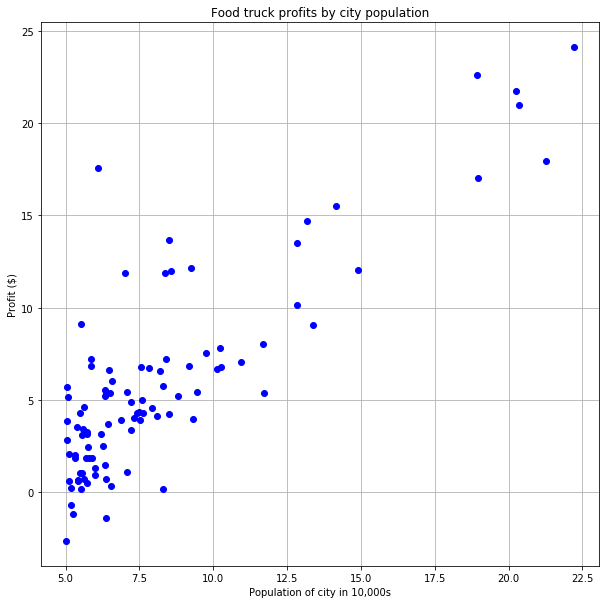

In [35]:
plt.figure(figsize=(10,10))
plt.plot(data['Population'], data['Profit'], 'bo')
plt.title('Food truck profits by city population')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()

### Gradient Descent
The objective of this section is to fit the linear regression parameters $\theta_0$ and $\theta_1$ to the dataset using gradient descent.

First, let's define the cost function:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 $$

Where the hypothesis is given by:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x $$

In [21]:
def computeCost(X, y, theta):
    """ Vectorised form of the least squares cost function """
    
    m = len(y)
    h = np.dot(X, theta)
    diff = np.power(h - y, 2)
    J = np.sum(diff)/(2*m)
    
    return J

Now to prepare the data to be passed into the cost function. First add a column of 1's so that the algorithm can be vectorised

In [17]:
# Insert column of ones to the feature set for theta_0
data.insert(0, 'theta_0', 1)

Our data was originally imported as a dataframe and must be converted to separate matrices $X$ and $y$

In [45]:
# Separate the feature set from the result parameter
X = np.matrix(data.iloc[:,0:2])
y = np.array(data.iloc[:,2])

# Define the transpose of theta
theta = np.array([0,0], dtype='float64')

Now, let's test the cost function on some examples

In [71]:
J = computeCost(X, y, theta)
print('Cost (J) = {0:.2f}'.format(J))

Cost (J) = 4.48


Now let's define the function to run gradient descent based on the following simultaneous update function:

$$ \theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)\\
\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^m((h_\theta(x_i)-y_i)x_i)$$

In [47]:
def gradientDescent(X, y, theta, alpha, n):
    """ Perform gradient descent to lern theta """

    J_history = []
    m = y.size
    
    for i in range(n):
        
        theta_0, theta_1 = theta
        
        # Perform simultaneous update
        inner = (np.dot(X, theta) - y)
        deriv_0 = inner
        deriv_1 = np.dot(inner, X)
        temp_0 = theta_0 - alpha/m*np.sum(deriv_0)
        temp_1 = theta_1 - alpha/m*np.sum(deriv_1)
        theta = np.array([temp_0, temp_1])
        
        # Compute the new cost
        J = computeCost(X, y, theta)

        # Save the cost J in every iteration
        J_history.append(J)

    return theta, J_history

Run gradient descent

In [70]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01

# Perform gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations);
print('theta_0 = {0:.2f}, theta_1 = {0:.2f}'.format(theta[0], theta[1]))

theta_0 = -3.87, theta_1 = -3.87


Let's inspect the resulting linear fit

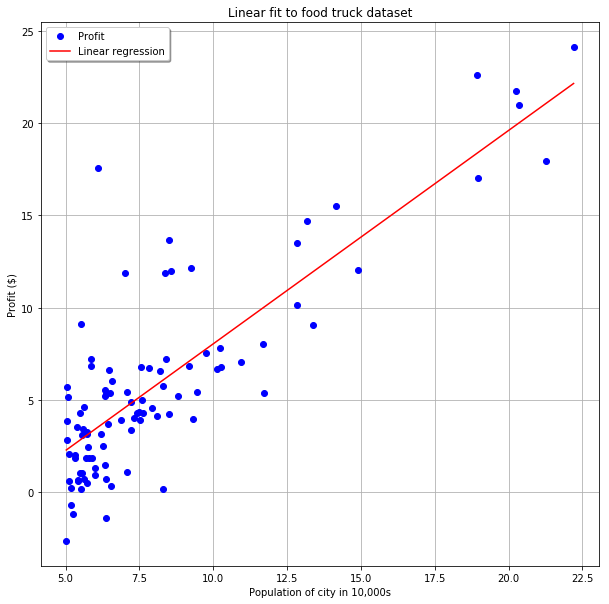

In [68]:
# Create linearly spaced vector, add column of ones to allow vectorised computation
x = np.linspace(X[:,1].min(), X[:,1].max(), 100)
x1 = np.stack([np.ones(x.size), x], axis=1)
f = np.dot(x1, theta)

# Show linear fit
plt.figure(figsize=(10,10))
plt.plot(data['Population'], data['Profit'], 'bo')
plt.plot(x, f, 'r-', label='Linear regression')
plt.legend(loc='upper left', shadow=True)
plt.title('Linear fit to food truck dataset')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()

### Visualising the cost function $J(\theta)$